In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
DA = 1.94  # r4 = DA
AB = 6.86  # r3 = AB
CB = 2.36  # r2 = CB
DC = 7.00  # r1 = DC

# Assign constants to variables
r1 = DC
r2 = CB
r3 = AB
r4 = DA

# Function definitions for Newton-Raphson
def f1(theta2, theta3, theta):
    return r2 * np.cos(theta2) + r3 * np.cos(theta3) - r4 * np.cos(theta) - r1

def f2(theta2, theta3, theta):
    return r2 * np.sin(theta2) + r3 * np.sin(theta3) - r4 * np.sin(theta)

# Jacobian matrix
def jacobian(theta2, theta3):
    return np.array([
        [-r2 * np.sin(theta2), -r3 * np.sin(theta3)],
        [r2 * np.cos(theta2),  r3 * np.cos(theta3)]
    ])

# Newton-Raphson system function
def newton_system(r1, r2, r3, r4, thetas):
    phi_vals = np.zeros_like(thetas, dtype=float)  # Store phi values (angle of link 3)
    phi_vals2 = np.zeros_like(thetas, dtype=float)  # Store auxiliary values if needed

    # Iterate over each theta to compute phi
    for theta_deg in thetas:
        i = int(theta_deg)
        theta_rad = np.deg2rad(theta_deg)  # Convert theta to radians for calculations

        # Use previous solution as initial guess
        theta2_old = np.deg2rad(30) if i == 0 else np.deg2rad(phi_vals[i - 1])
        theta3_old = np.deg2rad(0) if i == 0 else np.deg2rad(phi_vals2[i - 1])

        # Newton's Method parameters
        tolerance = 1e-4
        converged = False

        # Newton-Raphson loop
        while not converged:
            # Compute function values and Jacobian
            F = np.array([f1(theta2_old, theta3_old, theta_rad), f2(theta2_old, theta3_old, theta_rad)])
            J = jacobian(theta2_old, theta3_old)
            
            # Newton's method update
            delta = np.linalg.solve(J, F)
            theta2_new = theta2_old - delta[0]
            theta3_new = theta3_old - delta[1]

            # Check convergence
            if abs(theta2_new - theta2_old) < tolerance and abs(theta3_new - theta3_old) < tolerance:
                converged = True

            # Update for next iteration
            theta2_old = theta2_new
            theta3_old = theta3_new

        # Store computed phi (angle of link 3)
        phi_vals[i] = np.rad2deg(theta2_new)
        phi_vals2[i] = np.rad2deg(theta3_new)

    return phi_vals

# Theta range from 0° to 360° and storage arrays
thetas = np.arange(0, 361, 1)  # Theta range in degrees
phi_vals = newton_system(r1, r2, r3, r4, thetas)

# Compute derivatives (forward and centered difference)
dphi_dtheta_forward = np.zeros_like(thetas, dtype=float)
dphi_dtheta_centered = np.zeros_like(thetas, dtype=float)

# Forward difference for dphi/dtheta
dphi_dtheta_forward[:-1] = (phi_vals[1:] - phi_vals[:-1]) / np.deg2rad(1)

# Centered difference for dphi/dtheta
dphi_dtheta_centered[1:-1] = (phi_vals[2:] - phi_vals[:-2]) / (2 * np.deg2rad(1))




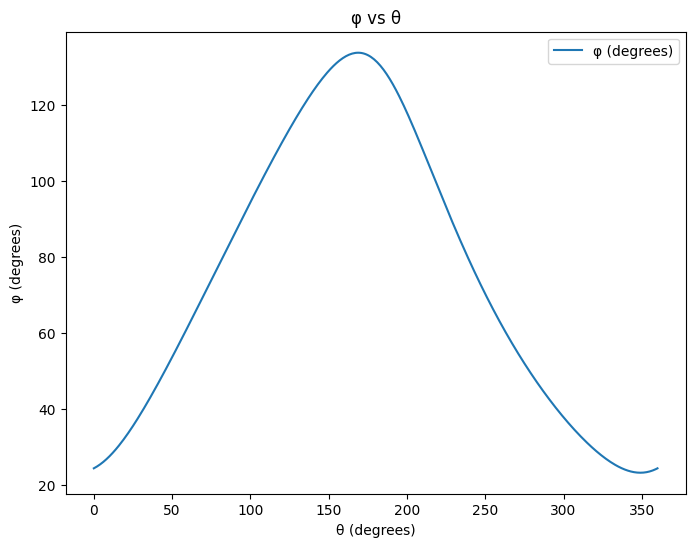

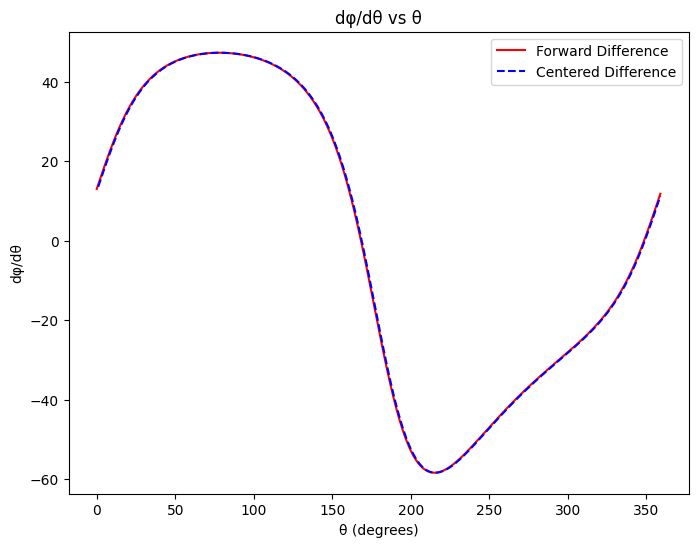

In [50]:
# Plotting phi vs theta
plt.figure(figsize=(8, 6))
plt.plot(thetas, phi_vals, label="φ (degrees)")
plt.xlabel("θ (degrees)")
plt.ylabel("φ (degrees)")
plt.title("φ vs θ")
plt.legend()
plt.show()

# Plotting dphi/dtheta vs theta with both approximations
plt.figure(figsize=(8, 6))
plt.plot(thetas[:-1], dphi_dtheta_forward[:-1], label="Forward Difference", color='red')
plt.plot(thetas[1:-1], dphi_dtheta_centered[1:-1], label="Centered Difference", linestyle='--', color='blue')
plt.xlabel("θ (degrees)")
plt.ylabel("dφ/dθ")
plt.title("dφ/dθ vs θ")
plt.legend()
plt.show()

In [ ]:
def normalize_angle(angle):
    return angle % 360

alpha_vals = np.zeros_like(thetas, dtype=float)
alpha_vals = 149 + phi_vals
#print(alpha_vals)
alpha_vals = normalize_angle(alpha_vals)

r12 = 1.25
r22 = 1.26
r32 = 1.87
r42 = 2.39
# Function definitions for Newton-Raphson
def f12(theta2, theta3, theta):
    return r22 * np.cos(theta2) + r32 * np.cos(theta3) - r42 * np.cos(theta) - r12

def f22(theta2, theta3, theta):
    return r22 * np.sin(theta2) + r32 * np.sin(theta3) - r42 * np.sin(theta)



# Newton-Raphson system function
def newton_system2(thetas):
    phi_vals = np.zeros_like(thetas, dtype=float)  
    phi_vals2 = np.zeros_like(thetas, dtype=float)  
    i = 0
    # Iterate over each theta to compute phi
    for theta_deg in thetas:
        
        theta_rad = np.deg2rad(theta_deg)  # Convert theta to radians for calculations

        # Use previous solution as initial guess
        theta2_old = np.deg2rad(330) if i == 0 else np.deg2rad(phi_vals[i - 1])
        theta3_old = np.deg2rad(30) if i == 0 else np.deg2rad(phi_vals2[i - 1])

        # Newton's Method parameters
        tolerance = 1e-4
        converged = False

        # Newton-Raphson loop
        while not converged:
            # Compute function values and Jacobian
            F = np.array([f12(theta2_old, theta3_old, theta_rad), f22(theta2_old, theta3_old, theta_rad)])
            J = jacobian(theta2_old, theta3_old)
            
            # Newton's method update
            delta = np.linalg.solve(J, F)
            theta2_new = theta2_old - delta[0]
            theta3_new = theta3_old - delta[1]

            # Check convergence
            if abs(theta2_new - theta2_old) < tolerance:
                converged = True

            # Update for next iteration
            theta2_old = theta2_new
            theta3_old = theta3_new

        # Store computed phi (angle of link 3)
        phi_vals[i] = np.rad2deg(theta2_new)
        phi_vals2[i] = np.rad2deg(theta3_new)
        i = i + 1

    return phi_vals

def normalize_angle(angle):
    return angle % 360

beta_vals = newton_system2(alpha_vals)



beta_vals = normalize_angle(beta_vals)


In [53]:
# Function for forward and centered differences
def compute_derivatives(beta_vals, thetas, omega):
    # Forward difference for dβ/dθ
    dbeta_dtheta_forward = np.zeros_like(beta_vals)

    dbeta_dtheta_forward[:-1] = np.deg2rad(beta_vals[1:] - beta_vals[:-1]) / np.deg2rad(1)

    # Centered difference for dβ/dθ
    dbeta_dtheta_centered = np.zeros_like(beta_vals)
    dbeta_dtheta_centered[1:-1] = np.deg2rad(beta_vals[2:] - beta_vals[:-2]) / (2 * np.deg2rad(1))

    # Angular velocity (dβ/dt) using both methods
    angular_velocity_forward = omega * dbeta_dtheta_forward
    angular_velocity_centered = omega * dbeta_dtheta_centered

    # Forward difference for d²β/dθ²
    d2beta_dtheta2_forward = np.zeros_like(beta_vals)
    d2beta_dtheta2_forward[:-2] = np.deg2rad(beta_vals[2:] - 2 * beta_vals[1:-1] + beta_vals[:-2]) / (np.deg2rad(1) ** 2)

    # Centered difference for d²β/dθ²
    d2beta_dtheta2_centered = np.zeros_like(beta_vals)
    d2beta_dtheta2_centered[1:-1] = np.deg2rad(beta_vals[2:] - 2 * beta_vals[1:-1] + beta_vals[:-2]) / (np.deg2rad(1) ** 2)

    # Angular acceleration (d²β/dt²) using both methods
    angular_acceleration_forward = omega ** 2 * d2beta_dtheta2_forward
    angular_acceleration_centered = omega ** 2 * d2beta_dtheta2_centered

    return angular_velocity_forward, angular_velocity_centered, angular_acceleration_forward, angular_acceleration_centered


angular_velocity_forward, angular_velocity_centered, angular_acceleration_forward, angular_acceleration_centered = compute_derivatives(beta_vals, thetas, 7.5)


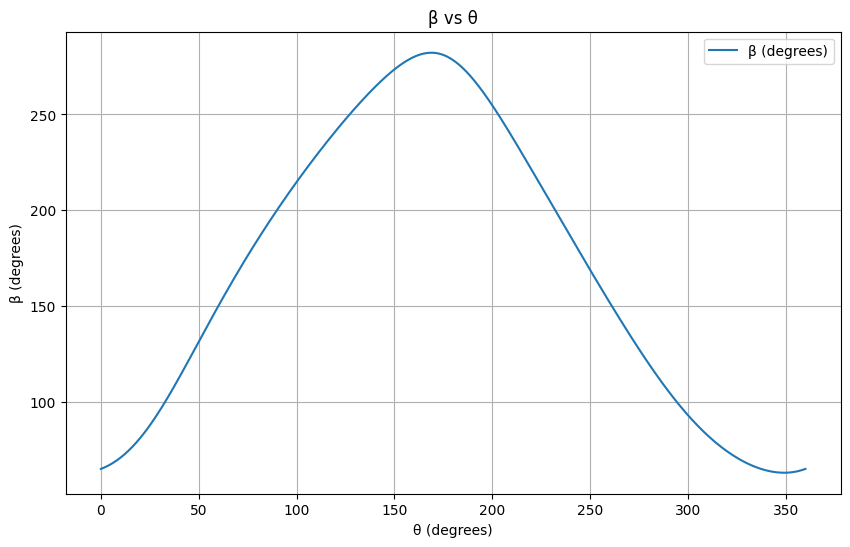

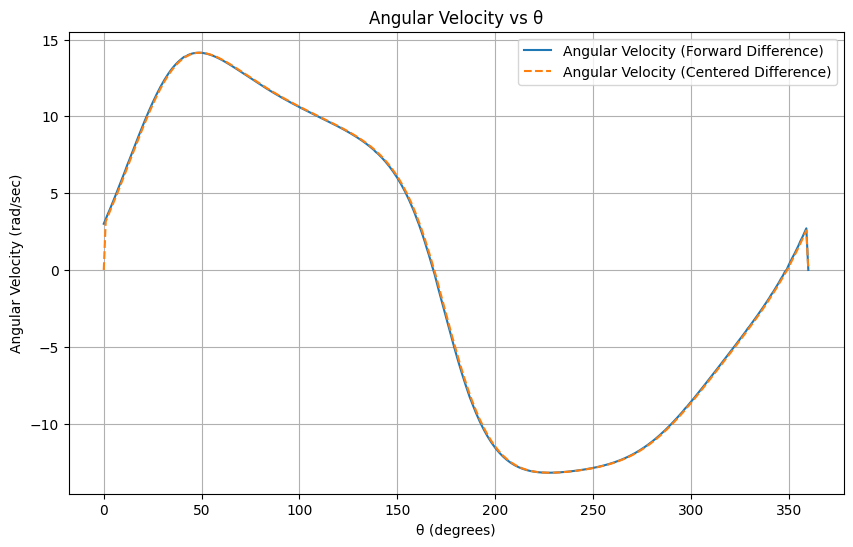

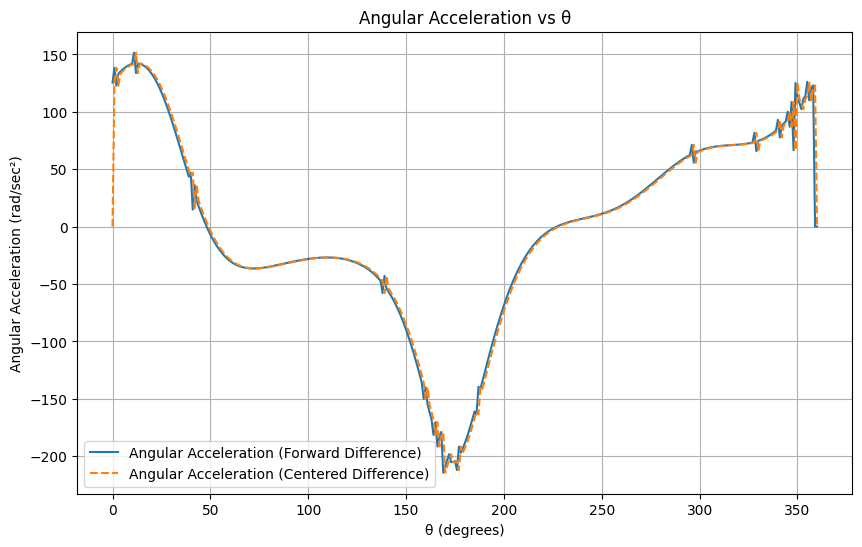

In [54]:
# Plot β vs θ
plt.figure(figsize=(10, 6))
plt.plot(thetas, beta_vals, label="β (degrees)")
plt.xlabel("θ (degrees)")
plt.ylabel("β (degrees)")
plt.title("β vs θ")
plt.legend()
plt.grid(True)
plt.show()

# Plot angular velocity vs θ
plt.figure(figsize=(10, 6))
plt.plot(thetas, angular_velocity_forward, label="Angular Velocity (Forward Difference)")
plt.plot(thetas, angular_velocity_centered, label="Angular Velocity (Centered Difference)", linestyle='--')
plt.xlabel("θ (degrees)")
plt.ylabel("Angular Velocity (rad/sec)")
plt.title("Angular Velocity vs θ")
plt.legend()
plt.grid(True)
plt.show()

# Plot angular acceleration vs θ
plt.figure(figsize=(10, 6))
plt.plot(thetas, angular_acceleration_forward, label="Angular Acceleration (Forward Difference)")
plt.plot(thetas, angular_acceleration_centered, label="Angular Acceleration (Centered Difference)", linestyle='--')
plt.xlabel("θ (degrees)")
plt.ylabel("Angular Acceleration (rad/sec²)")
plt.title("Angular Acceleration vs θ")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
print(angular_acceleration_forward[100])
print(angular_velocity_forward[100])

-28.1279083385469
10.60016126381953
